In [1]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score  
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [2]:
df = pd.read_csv(r"c:/Users/Ub Student/Documents/digits_dataset.csv",header = None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
5616,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
5617,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
5618,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [4]:
y = df[df.columns[-1]]

In [5]:
y

0       0
1       1
2       2
3       3
4       4
       ..
5615    9
5616    4
5617    6
5618    6
5619    7
Name: 64, Length: 5620, dtype: int64

In [6]:

X = df.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,5,13,11,2,0,0,0,2,...,10,0,0,0,8,13,15,10,1,0
5616,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,0,4,9,0,0,0
5617,0,0,3,15,0,0,0,0,0,0,...,4,0,0,0,4,14,16,9,0,0
5618,0,0,6,16,2,0,0,0,0,0,...,15,0,0,0,5,16,16,16,5,0


In [7]:
y

0       0
1       1
2       2
3       3
4       4
       ..
5615    9
5616    4
5617    6
5618    6
5619    7
Name: 64, Length: 5620, dtype: int64

In [8]:
X.shape

(5620, 64)

In [9]:
y.shape

(5620,)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [11]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(5620, 64)
(5620, 2)


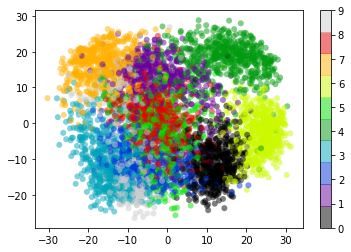

In [12]:
import matplotlib.pyplot as plt
# Creating a scatter plot of the datapoints
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

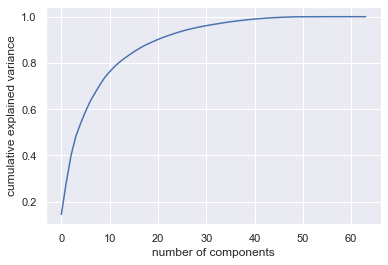

In [14]:
import numpy as np
import seaborn as sns
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

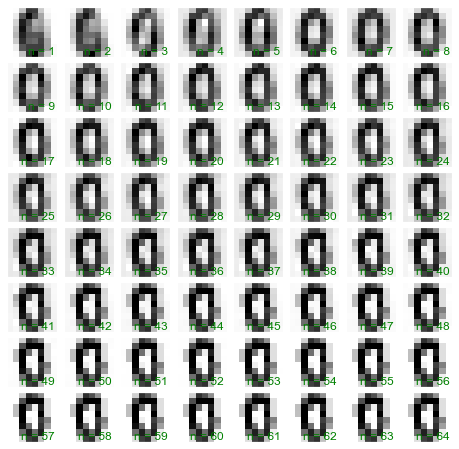

In [15]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
     
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])